Tarefa: Fornecer dados para um estudo sobre a popularidade das casas
baseada na ferramenta que temos no site (o bloco das casas mais
populares). Queremos entender a variação e flutuação do posicionamento
das casas de apostas de acordo com o número de visitas mensais.

Os Similar Web da nossa tabela de dados (que recolhemos visitas mensais
do Similar Web) e complementar se possível com dados dos meses que não
temos todas as informações (o SimilarWeb só nos permite ver dados de até
3 meses para trás) para nos responder algumas perguntas sobre o tópico.
É importante essa análise dos dados pelo Matheus para evitarmos dados
errados no conteúdo.

Além de responder as perguntas, o Matheus deve entregar um compilado
mostrando a variação do ranking das marcas. Por exemplo, deve nos
fornecer um material que indique a variação no ranking. Por exemplo,
Betano em março estava na 5ª posição, em abril estava na 5ª posição (sem
variação), em maio estava na 4ª posição (subiu 1), em junho estava na 3ª
posição (subiu 1) e em julho estava na 3ª posição (subiu 2).

In [1]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
import pandas as pd
from src.eda.data_processing import preprocess_dataframe
from src.eda.visualization import (
    plot_analysis_growth,
    plot_evolution,
    plot_stable_rankings,
    calculate_monthly_variation,
    display_results,
    plot_top_changes,
    calculate_brands_performance,
    display_performance_results,
    plot_brands_performance,
    identify_sustained_growth_brands,
    display_sustained_growth_results,
    plot_sustained_growth,
    calculate_position_variation,
    plot_position_gain_loss_simple,
    plot_position_gain_loss,
    get_top_movers,
    calculate_drop_and_recovery,
    plot_position_recovery_trend,
    identify_significant_drops,
    identify_recoveries,
    plot_recoveries,
    calculate_position_and_visit_variation,
    plot_position_vs_visits,
    plot_position_vs_visits_simple,
    get_top_position_variations,
    calculate_visit_variation,
    display_position_and_visit_changes,
    plot_monthly_visits_sum,
    prepare_input_for_plot_adjusted
)
from src.eda.statistics import get_avg_visits, generate_visits_summary

In [3]:
df = pd.read_csv("../data/bookmarkers_visits.csv")
df = preprocess_dataframe(df)
df.sample(5)

,betting_house,may,june,july,august,rank_may,rank_june,rank_july,rank_august,rank_change_may_june,rank_change_june_july,rank_change_july_august,growth_percentage
30,BetBoom,499252.0,3839136,3100230,2875650,43,34,30,31,9,4,1,475.991684
2,Betnacional,29770851.0,26175560,92147760,75234690,3,5,3,3,2,2,0,152.712595
39,Sportsbet.io,1240990.0,815744,823644,550615,34,40,39,40,6,1,1,-55.630988
26,Rivalo,3518128.0,5800704,4632732,4100093,25,26,28,27,1,2,1,16.541894
32,Betfast.io,1839021.0,1599200,1878120,1965819,31,36,34,33,5,2,1,6.894864


## Perguntas

Observações:
- Foram considerados apenas dados entre maio e agosto, uma vez que em
  março muitas casas de aposta não tem valores, o que dificultava a
  comparação
- As casas de aposta "Fivebet" e "Betpet" também foram removidas por não terem dados em
  alguns meses, principalmente em agosto. A "Betpet" também possui
  valores redondos (como 5.000 ou 120), o que parece ser aproximado e
  pode distorcer a análise.
- Ao final, 68 casas de aposta foram consideradas para as análises.

##### 1. Quais são as casas de apostas que mais ganharam popularidade nos últimos meses? Indicar os nomes das casas e a soma dos acessos mensais.

Na tabela abaixo conseguimos ver as casas com os maiores aumentos
percentuais entre maio e agosto, entre os destaques:
- Betpix, com crescimento de 995% e 4,6 milhões de acessos no período
- ijogo.com, com crescimento de 943% e 34,7 milhões de acessos no periodo
- 7games.bet, com crescimento de 635% e 137,6 milhões de acessos no período

In [6]:
df_plot = df.copy()
df_plot = df_plot.sort_values(by="growth_percentage", ascending=False)
result = generate_visits_summary(df_plot).head(10).reset_index(drop=True)
result

,betting_house,growth_percentage,visits_sum,visits_avg
0,Betpix,995%,4.6 milhões,1.1 milhões
1,ijogo.com,943%,34.7 milhões,8.7 milhões
2,7games.bet,635%,137.6 milhões,34.4 milhões
3,PariMatch,575%,41.9 milhões,10.5 milhões
4,RealsBet,570%,12.4 milhões,3.1 milhões
5,1xbet,498%,2.8 milhões,710.8 mil
6,BetBoom,476%,10.3 milhões,2.6 milhões
7,BC.Game,376%,2.2 milhões,557.0 mil
8,Esporte da Sorte,307%,163.2 milhões,40.8 milhões
9,Betano,265%,263.4 milhões,65.9 milhões


No gráfico a seguir, temos o número de visitas das casas com maior
crescimento percentual

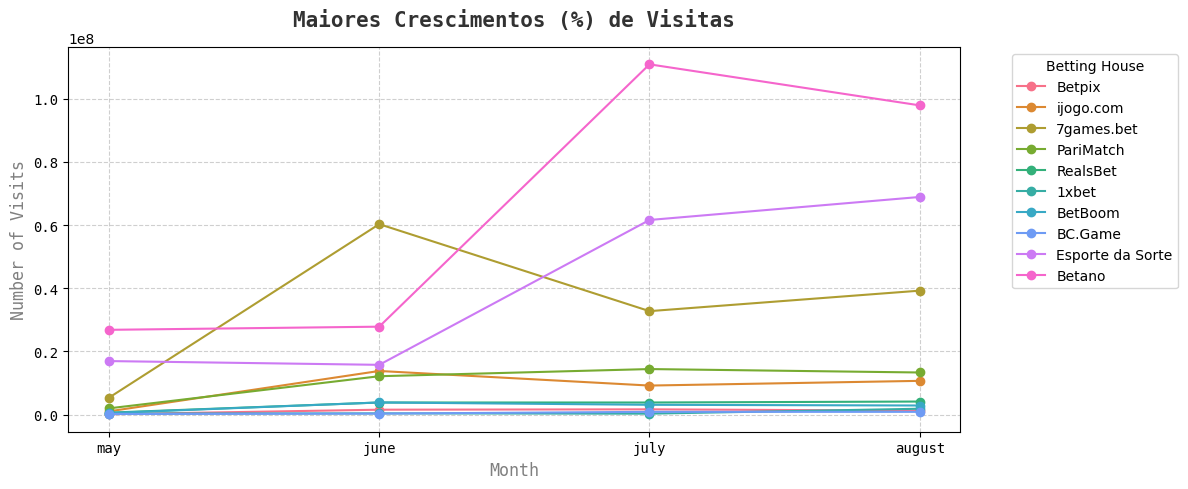

In [7]:
df_plot = df.copy()
df_plot = df_plot.sort_values(by="growth_percentage", ascending=False).head(10)

plot_evolution(
    df=df_plot,
    title="Maiores Crescimentos (%) de Visitas",
    figsize=(12, 5)
)

No gráfico a seguir, temos o percentual de crescimento (ou declínio) no
período de todas as casas.

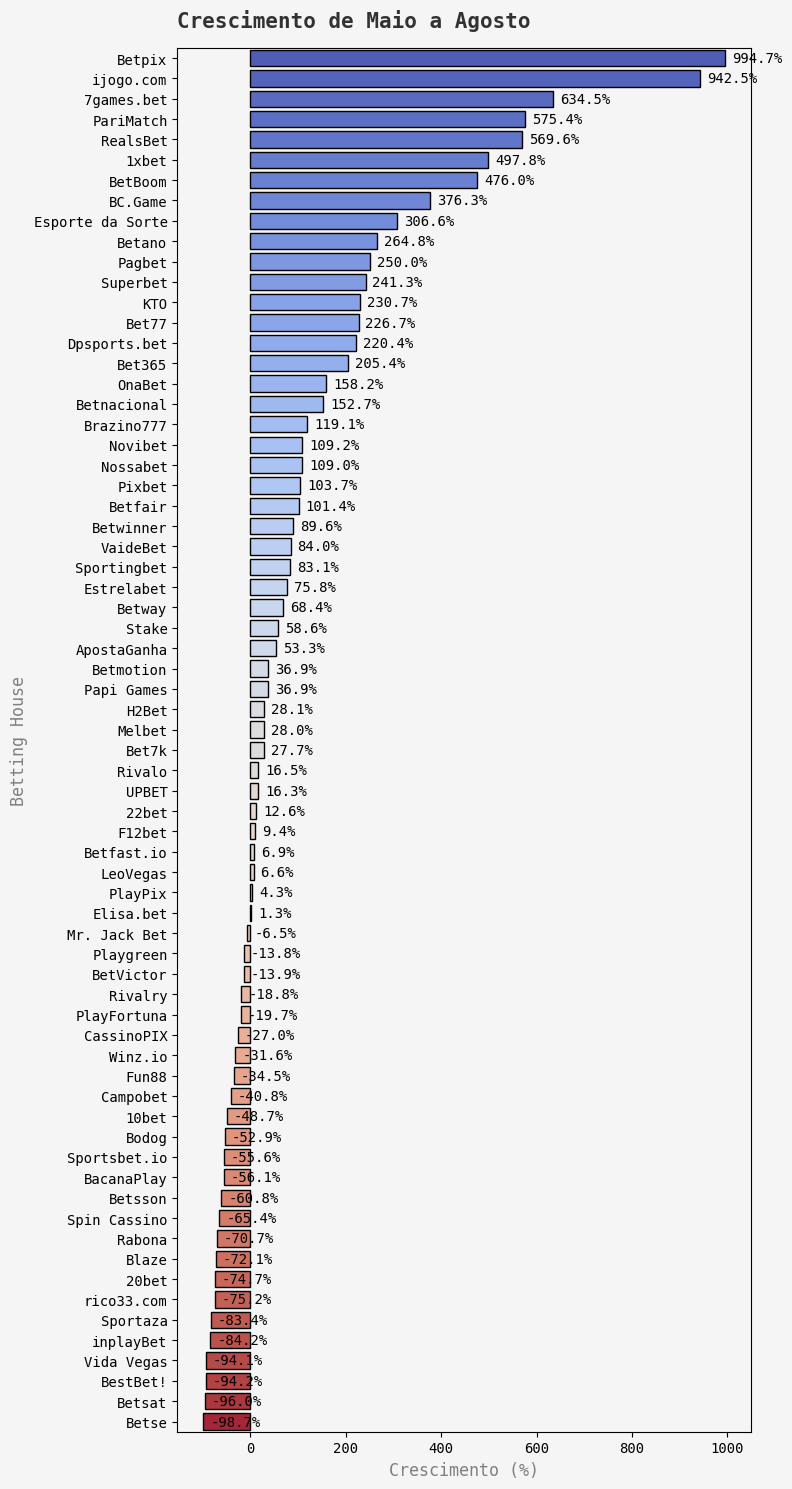

In [9]:
df_plot = df.copy()
df_plot = df_plot.sort_values(by="growth_percentage", ascending=False)
plot_analysis_growth(df=df_plot, figsize=(8, 15))

#### 2. Quais casas de apostas perderam popularidade de forma mais acentuada?  Indicar os nomes das casas e a percentagem que perderam de visitas.
Todos os valores estão abaixo, destaques para:
- Betse com queda de 99%
- Betsat com queda de 96%
- BestBet e Vida Vegas, ambas com quedas de 94%

In [11]:
df_plot = df.copy()
df_plot = df_plot.sort_values(by="growth_percentage", ascending=False)
result = generate_visits_summary(df_plot).tail(10).reset_index(drop=True)
result

,betting_house,growth_percentage,visits_sum,visits_avg
0,Rabona,-71%,42.1 mil,10.5 mil
1,Blaze,-72%,72.5 milhões,18.1 milhões
2,20bet,-75%,8.8 milhões,2.2 milhões
3,rico33.com,-75%,18.2 milhões,4.5 milhões
4,Sportaza,-83%,24.1 mil,6.0 mil
5,inplayBet,-84%,450.2 mil,112.6 mil
6,Vida Vegas,-94%,2.6 milhões,641.8 mil
7,BestBet!,-94%,61.6 mil,15.4 mil
8,Betsat,-96%,14.1 milhões,3.5 milhões
9,Betse,-99%,22.7 milhões,5.7 milhões


No gráfico a seguir, temos os valores de visitas das casas com maiores
quedas percentuais.

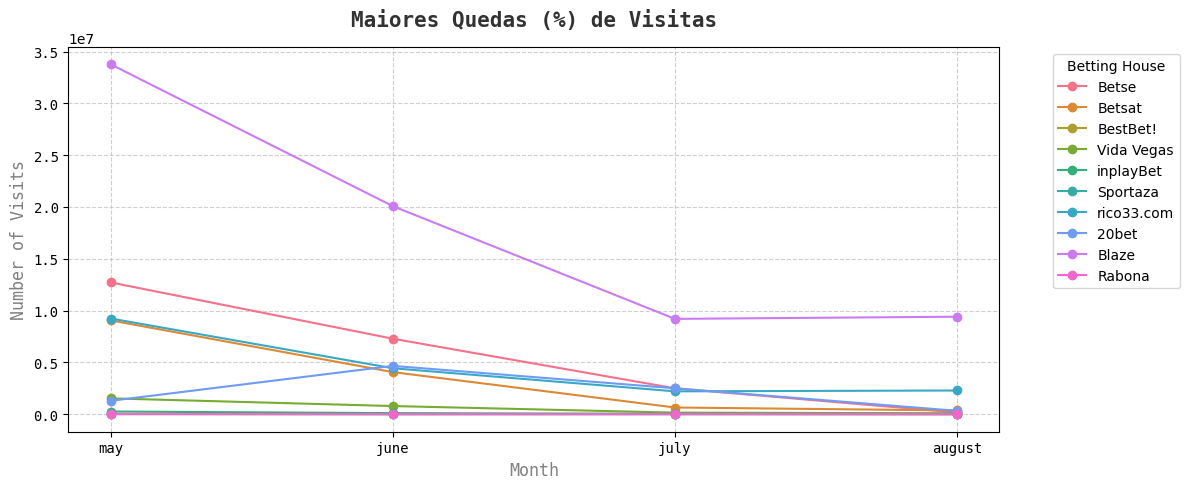

In [10]:
df_plot = df.copy()
df_plot = df_plot.sort_values(by="growth_percentage", ascending=True).head(10)

plot_evolution(
    df=df_plot,
    title="Maiores Quedas (%) de Visitas",
    figsize=(12, 5)
)

#### 3. Quais casas de apostas mantiveram sua posição estável nos últimos meses? Indicar os nomes das casas e a média de visitas.

A tabela abaixo mostra as 10 casas de aposta mais estáveis quando
falamos de ranking. Destaques:
- Bet7k era a primeira no ranking em maio e caiu para segunda em agosto
  (84,5 milhões de visitas, em média)
- Betnacional se manteve na terceira colocação (55,8 milhões de visitas
  mensais, em média)

In [33]:
df_plot = df.copy()
df_plot["average_rank"] = df_plot[
    ["rank_may", "rank_june", "rank_july", "rank_august"]
].mean(axis=1)
df_plot["rank_variation"] = df_plot[
    ["rank_may", "rank_june", "rank_july", "rank_august"]
].std(axis=1)
df_plot = df_plot.sort_values(by="rank_variation", ascending=True).head(10)
df_avg_visits = get_avg_visits(df=df_plot)
df_avg_visits

,betting_house,initial_rank,final_rank,average_visits
52,PlayFortuna,54,53,87.7 mil
1,Bet7k,1,2,84.5 milhões
44,LeoVegas,46,45,340.0 mil
24,ApostaGanha,24,25,5.2 milhões
8,Sportingbet,8,9,27.0 milhões
5,Estrelabet,5,6,38.2 milhões
65,Campobet,68,66,2.9 mil
64,BetVictor,67,65,4.3 mil
66,Sportaza,65,67,6.0 mil
2,Betnacional,3,3,55.8 milhões


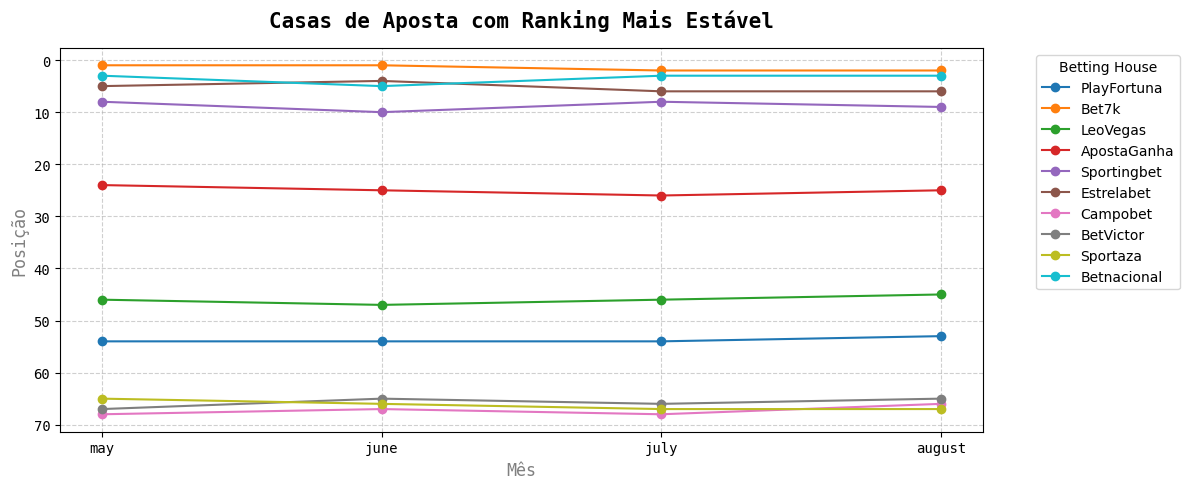

In [29]:
plot_stable_rankings(df=df_plot, figsize=(12, 5))

#### 4. Houve algum mês em que a variação foi mais acentuada no ranking? Indicar o mês e a porcentagem de variação e quais casas tiveram maior variação neste mês.

In [4]:
df_variation = calculate_monthly_variation(df)
display_results(df_variation)

Mês com maior variação: May-June
Variação média de posições: 5.8 posições
Porcentagem de variação média: 8.5%

Top 10 casas de apostas com maior variação no mês:
Dpsports.bet: 41 posições
ijogo.com: 24 posições
Bet77: 20 posições
7games.bet: 19 posições
PariMatch: 17 posições
Betsat: 16 posições
rico33.com: 15 posições
Betpix: 15 posições
KTO: 14 posições
Mr. Jack Bet: 14 posições


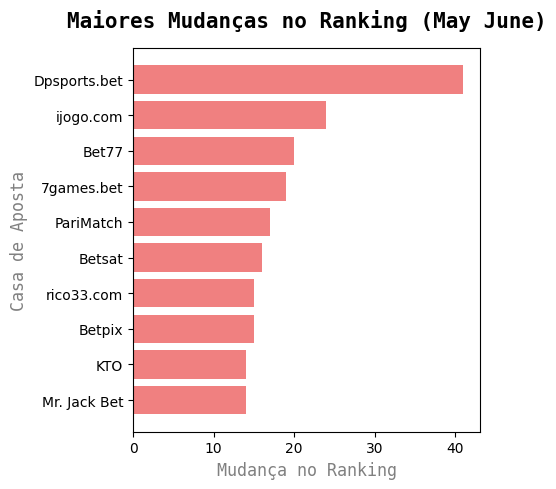

In [35]:
plot_top_changes(
    df=df_variation["top_changes_filtered"],
    max_change_month=df_variation["max_change_month"],
    title="Maiores Mudanças no Ranking",
    figsize=(5, 5)
)

#### 5. As visitas às casas de apostas online cresceram em algum mês específico devido a grandes eventos esportivos? Para essa resposta, Matheus, se conseguir correlacionar os picos de visitas em um mês com grandes eventos como finais de campeonatos esportivos ou Olimpíadas, pode ser interessante. Se não for possível, pode pular essa pergunta.

Houve um crescimento muito grande no número de visitas de junho (519 milhões) para
julho (873 milhões). Muito provavelmente ligado a:
- Fases de mata mata da Eurocopa
- Fases de mata mata da Copa América
- Olimpiadas

Em agosto, o número de visitas voltou a cair, porém se manteve no
patamar de 800 milhões.

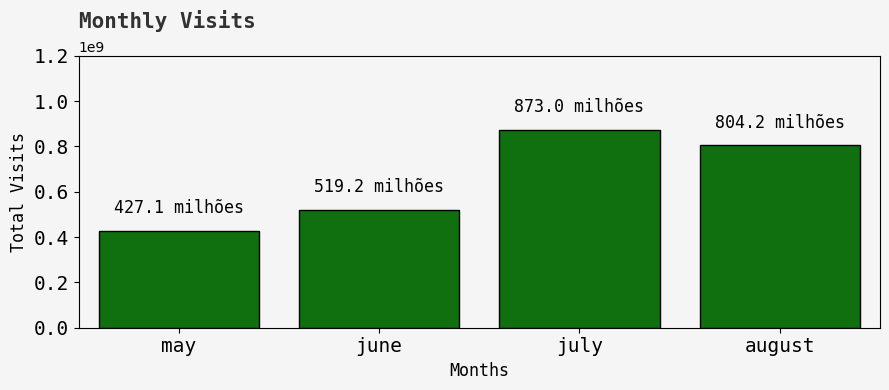

In [27]:
plot_monthly_visits_sum(
    df,
    ["may", "june", "july", "august"],
    bar_color="green",
    title="Monthly Visits",
    xlabel="Months",
    ylabel="Total Visits",
    figsize=(9, 4),
    fontfamily="monospace",
    title_padding=20,
    x_label_color="black",
    y_label_color="black",
    x_ticks_fontsize=14,
    y_ticks_fontsize=14,
    y_min=0,
    y_max=1200000000,
    show_values=True,
    value_fontsize=12,
    value_color="black",
    value_offset=(0, 10),
)

#### 6. Quais casas de apostas têm crescido mais rápido em comparação com suas concorrentes? Indicar as casas que tiveram o maior ganho de posição e comparar com as que mantiveram ou perderam posições. Trazer essa variação em números.
Os números e visualizações estão abaixo. Destaques:
- Betnacional e Brazino777 mantiveram ótimas posições no ranking
- ijogo.com	ganhou 19 posições (do 36 para o 17)
- 7games.bet ganhou 13 posições e atualmente figura no top 10
- Betpix ganhou 17 posições (52 para 35)
- Betse perderu 39 posições (do 11 ao 50)

In [6]:
df_variation = calculate_position_variation(df, ["rank_may", "rank_august"])
result_df = get_top_movers(df_variation, top_n=5)
result_df

,betting_house,initial_rank,final_rank,position_variation,performance
0,Betnacional,3,3,0,Maintained
1,Brazino777,10,10,0,Maintained
2,ijogo.com,36,17,19,Gained
3,Betpix,52,35,17,Gained
4,PariMatch,30,15,15,Gained
5,RealsBet,40,26,14,Gained
6,7games.bet,21,8,13,Gained
7,Betse,11,50,-39,Lost
8,Betsat,17,44,-27,Lost
9,Vida Vegas,32,52,-20,Lost


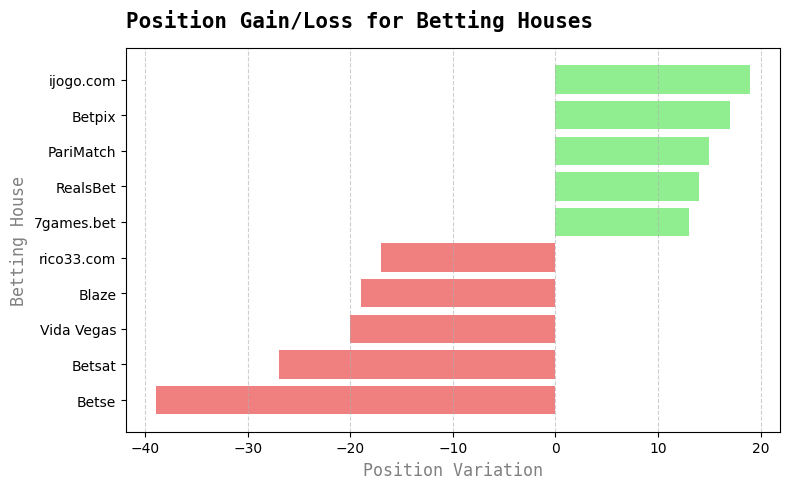

In [7]:
plot_position_gain_loss(df=df_variation,figsize=(8, 5))

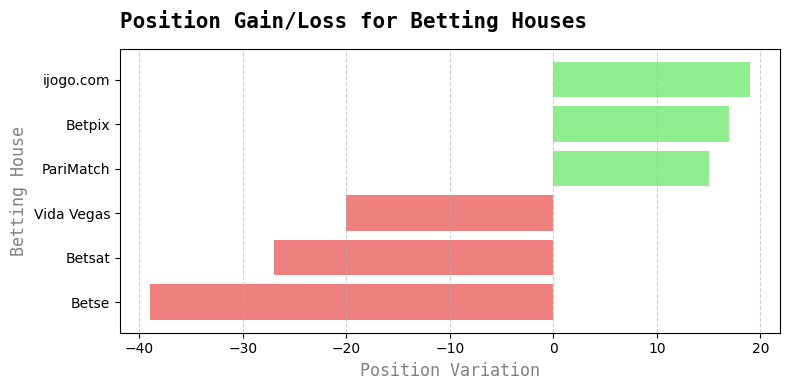

In [10]:
df_variation = calculate_position_variation(df, ["rank_may", "rank_august"])

plot_position_gain_loss(
    df_variation,
    show_top_n=3,
    show_only=None,
    figsize=(8, 4)
)

#### 7. Quais casas de apostas conseguiram reverter uma queda significativa e retomar posições? Indicar as casas que perderam popularidade em um mês, mas conseguiram se recuperar nos meses seguintes
Os dados estão abaixo. Destaques:
- Dpsports.bet começou na posição 27, caiu para 68 e em julho apareceu
  na 17
- 7games.bet estava na posição 21 em maio, chegou a ficar na segunda
  colocação em junho e em agosto está na oitava.
- RealsBet estava na posição 40 em maio e a partir daí só subiu (35, 29
  e 26).

In [4]:
ranking_columns_example = ['rank_may', 'rank_june', 'rank_july', 'rank_august']
result = calculate_drop_and_recovery(df, ranking_columns_example)
result.head(10)

,betting_house,rank_may,rank_june,rank_july,rank_august,recovery_amount
0,Dpsports.bet,27,68,17,19,51
1,OnaBet,23,17,47,16,31
2,ijogo.com,36,12,20,17,24
3,Bet77,51,31,43,43,20
4,7games.bet,21,2,9,8,19
5,Betpix,52,37,35,35,17
6,PariMatch,30,13,15,15,17
7,1xbet,47,45,49,34,15
8,KTO,28,14,18,18,14
9,RealsBet,40,35,29,26,14


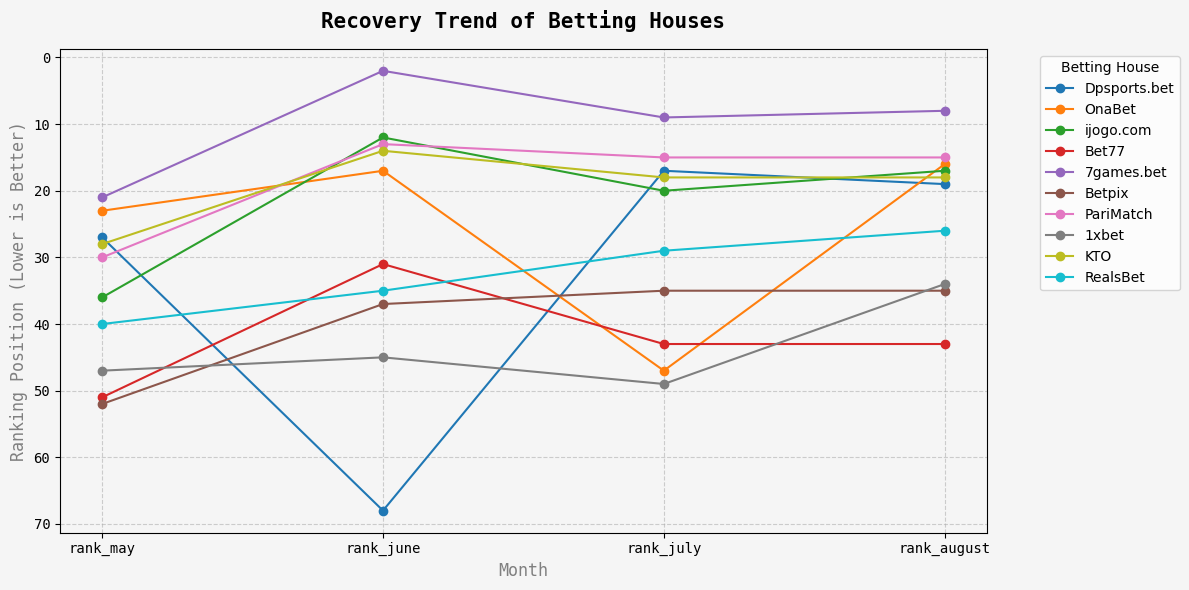

In [17]:
result = calculate_drop_and_recovery(df, ranking_columns_example)
plot_position_recovery_trend(result.head(10))

In [8]:
identify_significant_drops(df, ["rank_may", "rank_june", "rank_july", "rank_august"], drop_threshold=10)

,betting_house,from_month,to_month,significant_drop
0,7games.bet,rank_may,rank_june,19
1,PariMatch,rank_may,rank_june,17
2,ijogo.com,rank_may,rank_june,24
3,KTO,rank_may,rank_june,14
4,Betpix,rank_may,rank_june,15
5,Bet77,rank_may,rank_june,20
6,Brazino777,rank_june,rank_july,13
7,Dpsports.bet,rank_june,rank_july,51
8,Mr. Jack Bet,rank_june,rank_july,11
9,BC.Game,rank_june,rank_july,11


In [9]:
df_drops = identify_significant_drops(
    df, ["rank_may", "rank_june", "rank_july", "rank_august"], drop_threshold=3
)
identify_recoveries(df, df_drops, ["rank_may", "rank_june", "rank_july", "rank_august"])

,betting_house,drop_month,recovery_month,position_drop,position_recovered
0,RealsBet,rank_june,rank_july,5,6
1,Pagbet,rank_june,rank_july,7,1
2,BetBoom,rank_june,rank_july,9,4
3,Betpix,rank_june,rank_july,15,2
4,Betmotion,rank_june,rank_july,3,1
5,Esporte da Sorte,rank_july,rank_august,6,1
6,Pixbet,rank_july,rank_august,7,1
7,RealsBet,rank_july,rank_august,6,3
8,Papi Games,rank_july,rank_august,8,3


#### 8. Como a variação nas posições das principais casas de apostas se compara à variação em visitas totais ao site? Analisar se o aumento ou a queda nas posições acompanha a variação no número de visitas mensais ou se existem casas que conseguem se manter no topo mesmo com flutuações menores no tráfego. Indicar quais são essas casas.

In [69]:
df_stability = prepare_input_for_plot_adjusted(df)
df_stability

,betting_house,rank_may,rank_august,stability_status,avg_visit_variation_percent
0,Betano,4,1,Unstable,96.8%
1,Bet7k,1,2,Stable,11.9%
2,Betnacional,3,3,Stable,73.9%
3,Esporte da Sorte,9,4,Unstable,98.6%
4,Bet365,7,5,Stable,76.2%
...,...,...,...,...,...
63,Rabona,62,64,Stable,-21.7%
64,BetVictor,67,65,Stable,-2.0%
65,Campobet,68,66,Stable,159.0%
66,Sportaza,65,67,Stable,-4.7%


#### 9. Quais casas de apostas apresentaram a maior variação positiva e negativa de posição de um mês para o outro? Indicar marcas que tiveram um grande salto ou queda em um mês específico e mostrar a variação de visitas e posicionamento em porcentagem.

In [31]:
top_variations_with_visits = get_top_position_variations(
    df, ["rank_may", "rank_june", "rank_july", "rank_august"], top_n=5
)
result_with_visits = calculate_visit_variation(
    top_variations_with_visits, ["may", "june", "july", "august"]
)
result_with_visits = result_with_visits[
    [
        "betting_house",
        "position_change",
        "from_month",
        "to_month",
        "visit_variation_percent",
        "rank_may",
        "rank_june",
        "rank_july",
        "rank_august",
    ]
]
result_with_visits["visit_variation_percent"] = result_with_visits[
    "visit_variation_percent"
].apply(lambda x: f"{int(round(x))}%")
result_with_visits.sort_values("position_change", ascending=False)

,betting_house,position_change,from_month,to_month,visit_variation_percent,rank_may,rank_june,rank_july,rank_august
10,Dpsports.bet,51,rank_june,rank_july,410165%,27,68,17,19
20,OnaBet,31,rank_july,rank_august,3234%,23,17,47,16
0,ijogo.com,24,rank_may,rank_june,1248%,36,12,20,17
1,Bet77,20,rank_may,rank_june,3263%,51,31,43,43
2,7games.bet,19,rank_may,rank_june,1029%,21,2,9,8
3,PariMatch,17,rank_may,rank_june,516%,30,13,15,15
21,1xbet,15,rank_july,rank_august,529%,47,45,49,34
4,Betpix,15,rank_may,rank_june,1255%,52,37,35,35
11,Brazino777,13,rank_june,rank_july,442%,10,20,7,10
13,BC.Game,11,rank_june,rank_july,177%,50,48,37,37


In [21]:
display_position_and_visit_changes(result_with_visits)

ijogo.com:
  De May para June:
  Mudança de posição: 24 posições positivas
  Variação de visitas: 1247.89%

Bet77:
  De May para June:
  Mudança de posição: 20 posições positivas
  Variação de visitas: 3262.58%

Dpsports.bet:
  De May para June:
  Mudança de posição: -41 posições negativas
  Variação de visitas: -99.91%

Betsat:
  De May para June:
  Mudança de posição: -16 posições negativas
  Variação de visitas: -55.10%

Dpsports.bet:
  De June para July:
  Mudança de posição: 51 posições positivas
  Variação de visitas: 410165.48%

Brazino777:
  De June para July:
  Mudança de posição: 13 posições positivas
  Variação de visitas: 442.45%

OnaBet:
  De June para July:
  Mudança de posição: -30 posições negativas
  Variação de visitas: -96.80%

Bet77:
  De June para July:
  Mudança de posição: -12 posições negativas
  Variação de visitas: -89.97%



#### 10. Quais marcas tiveram o maior crescimento acumulado em posição ao longo do último trimestre? Indicar as marcas que conseguiram uma melhoria contínua em suas posições no trimestre e mostrar a variação de visitas e posicionamento em porcentagem.

In [32]:
top_growth_brands_result = calculate_brands_performance(df, performance_type="growth")
display_performance_results(top_growth_brands_result, performance_type="growth")

Maior crescimento acumulado em posição no último trimestre:

Dpsports.bet:
  Posição em junho: 68
  Posição em julho: 17
  Posição em agosto: 19
  Mudança acumulada em posição: 49 posições
  Variação de visitas: 362881.85%
  Variação de posicionamento: 72.06%

1xbet:
  Posição em junho: 45
  Posição em julho: 49
  Posição em agosto: 34
  Mudança acumulada em posição: 11 posições
  Variação de visitas: 378.03%
  Variação de posicionamento: 24.44%

BC.Game:
  Posição em junho: 48
  Posição em julho: 37
  Posição em agosto: 37
  Mudança acumulada em posição: 11 posições
  Variação de visitas: 177.83%
  Variação de posicionamento: 22.92%

Papi Games:
  Posição em junho: 49
  Posição em julho: 41
  Posição em agosto: 38
  Mudança acumulada em posição: 11 posições
  Variação de visitas: 158.20%
  Variação de posicionamento: 22.45%

Brazino777:
  Posição em junho: 20
  Posição em julho: 7
  Posição em agosto: 10
  Mudança acumulada em posição: 10 posições
  Variação de visitas: 251.18%
  Vari

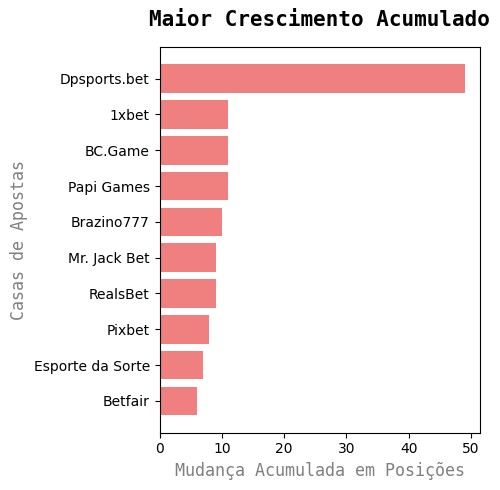

In [33]:
plot_brands_performance(
    df=top_growth_brands_result, performance_type="growth", figsize=(5, 5)
)

#### 11. Quais casas de apostas apresentaram a maior queda acumulada no último trimestre? Indicar marcas que caíram consistentemente durante o trimestre e mostrar a variação de visitas e posicionamento em porcentagem.

In [34]:
top_decline_brands_result = calculate_brands_performance(df, performance_type="decline")
display_performance_results(top_decline_brands_result, performance_type="decline")

Maior queda acumulada em posição no último trimestre:

Betse:
  Posição em junho: 23
  Posição em julho: 32
  Posição em agosto: 50
  Mudança acumulada em posição: -27 posições
  Variação de visitas: -97.68%
  Variação de posicionamento: -117.39%

20bet:
  Posição em junho: 29
  Posição em julho: 31
  Posição em agosto: 46
  Mudança acumulada em posição: -17 posições
  Variação de visitas: -92.96%
  Variação de posicionamento: -58.62%

Blaze:
  Posição em junho: 8
  Posição em julho: 19
  Posição em agosto: 21
  Mudança acumulada em posição: -13 posições
  Variação de visitas: -53.13%
  Variação de posicionamento: -162.50%

Bet77:
  Posição em junho: 31
  Posição em julho: 43
  Posição em agosto: 43
  Mudança acumulada em posição: -12 posições
  Variação de visitas: -90.29%
  Variação de posicionamento: -38.71%

Betsat:
  Posição em junho: 33
  Posição em julho: 40
  Posição em agosto: 44
  Mudança acumulada em posição: -11 posições
  Variação de visitas: -91.04%
  Variação de posicion

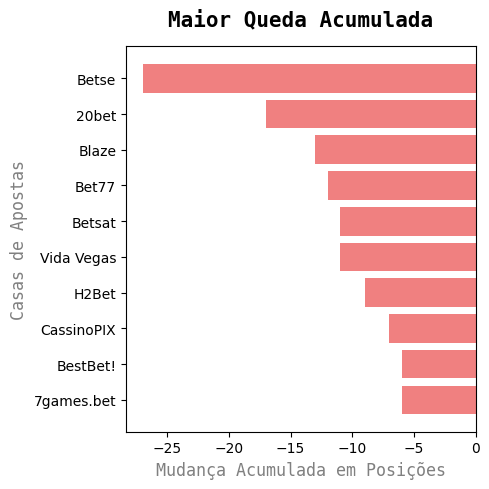

In [35]:
plot_brands_performance(df=top_decline_brands_result, performance_type="decline", figsize=(5, 5))

#### 12. Quais casas de apostas que tiveram crescimento expressivo em um mês, conseguiram manter esse crescimento ao longo do trimestre? Indicar as casas que tiveram um pico de crescimento mensal e ver se conseguiram sustentar o crescimento ao longo de três meses e mostrar a variação de visitas e posicionamento em porcentagem.

In [36]:
top_sustained_growth_brands = identify_sustained_growth_brands(df, growth_threshold=20)
display_sustained_growth_results(top_sustained_growth_brands)

Casas de apostas que mantiveram crescimento após pico mensal:

Esporte da Sorte:
  Posição em junho: 11
  Posição em julho: 5
  Posição em agosto: 4
  Crescimento junho-julho: 291.16%
  Crescimento julho-agosto: 11.83%
  Crescimento total de visitas: 337.43%
  Mudança acumulada em posição: 7 posições

Nossabet:
  Posição em junho: 58
  Posição em julho: 61
  Posição em agosto: 55
  Crescimento junho-julho: 21.45%
  Crescimento julho-agosto: 236.93%
  Crescimento total de visitas: 309.20%
  Mudança acumulada em posição: 3 posições

BC.Game:
  Posição em junho: 48
  Posição em julho: 37
  Posição em agosto: 37
  Crescimento junho-julho: 177.21%
  Crescimento julho-agosto: 0.23%
  Crescimento total de visitas: 177.83%
  Mudança acumulada em posição: 11 posições

Papi Games:
  Posição em junho: 49
  Posição em julho: 41
  Posição em agosto: 38
  Crescimento junho-julho: 107.46%
  Crescimento julho-agosto: 24.46%
  Crescimento total de visitas: 158.20%
  Mudança acumulada em posição: 11 pos

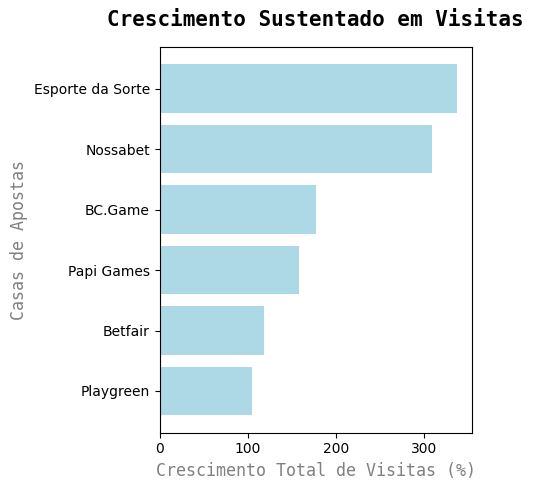

In [37]:
plot_sustained_growth(df=top_sustained_growth_brands,figsize=(5,5))